In [1]:
%pylab inline
from datetime import date
from app import create_app
from app.instrument import Instrument
from app.analysis import Quote
with create_app().app_context():
    quote = Quote([b.symbol for b in Instrument.find_reits()], 100)
f'from {quote.start.date()} to {date.today()}'

Populating the interactive namespace from numpy and matplotlib


'from 2019-02-27 to 2019-06-07'

In [3]:
stat = quote.statistics(21)
stat = stat[(stat['drawdown'] < 5) & (stat['21-mean'] > 0.5)]
stat

,21-len,21-mean,21-std,21-shrp,drawdown
Symbols,,,,,
BXMT,50,2.311529,1.212896,1.759862,2.677343
INVH,50,3.616657,2.080415,1.653351,3.809150
SOHO,50,3.695904,2.161749,1.627804,3.034683
EQIX,50,4.824280,3.405510,1.364635,4.324717
BRG,50,3.379426,2.363710,1.354830,4.035088
WPC,50,3.695158,2.903911,1.211524,4.296338
PMT,50,2.086223,1.840065,1.037585,4.901510
AMT,50,3.974452,4.169534,0.910762,4.096787
GLPI,50,3.436712,3.866656,0.843031,4.020723


In [4]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(21, 2)

['BXMT', 'INVH'] -2.060310780737943 -0.26872005933543774 1.6216231080536982 -3.4132138294562036


['BXMT', 'INVH']

In [7]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(21, 2, ['VNQ'])

['VNQ', 'BXMT'] -0.2378027524941011 0.42499153638512777 1.663089170872795 -2.325883459752024


['VNQ', 'BXMT']

In [8]:
quote.setup_mask(['BXMT', 'VNQ'])
quote.find_optimal_ratio(21, 2)

/Users/chaoyi/.local/share/virtualenvs/portfolio_analysis-bdMx2S3t/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


(Symbols
 BXMT    0.813174
 VNQ     0.186826
 dtype: float64, 2.1385, 1.1398)

,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
BXMT,50.0,2.311529,1.212896,-0.871525,1.843134,2.440569,3.279973,4.384921,1.759862,2.677343
Portfolio,50.0,2.134219,1.139480,-0.699426,1.592412,2.393823,2.855070,4.074016,1.717642,2.428422
VNQ,50.0,1.385469,2.135025,-2.311019,-0.126578,0.826831,3.235948,5.608280,0.566021,3.975014


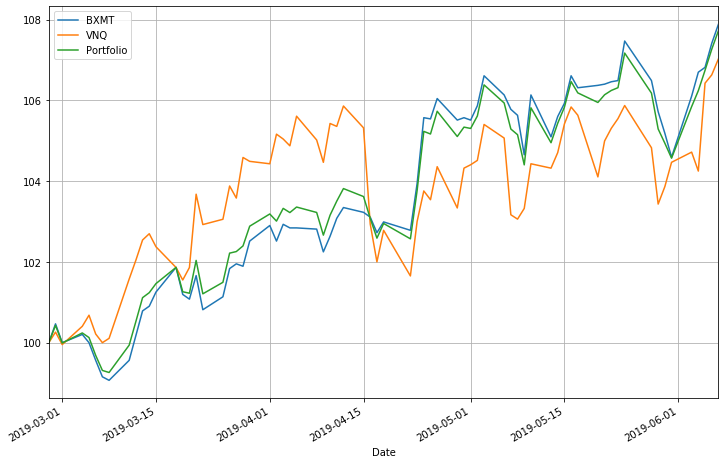

In [6]:
quote.graph(21, {'BXMT': 0.813174, 'VNQ': 0.186826})